<a href="https://colab.research.google.com/github/BillWorstell/derenzo_phantom/blob/master/iCheckRotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Open In Colab

https://vivekg.dev/DiffDRR/

install DiffDRR from PyPI:

In [1]:
!pip install diffdrr

#Set up DiffDRR environment

In [2]:
import os
import sys
import torch
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith("2.1.") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip install fvcore iopath
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'



Install icecream for debug printing

https://github.com/gruns/icecream

In [3]:
!pip install icecream
from icecream import ic

From https://github.com/rossbar/derenzo_phantom

From derenzo_log.py

In [4]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpp

https://vivekg.dev/DiffDRR/

Usage

The following minimal example specifies the geometry of the projectional radiograph imaging system and traces rays through a CT volume:

#Install DiffDRR

Use the version of DiffDRR posted on github

In [5]:
!pip install 'git+https://github.com/BillWorstell/DiffDRR.git'

  Cloning https://github.com/BillWorstell/DiffDRR.git to /tmp/pip-req-build-7f_1__wd
  Running command git clone --filter=blob:none --quiet https://github.com/BillWorstell/DiffDRR.git /tmp/pip-req-build-7f_1__wd
  Resolved https://github.com/BillWorstell/DiffDRR.git to commit 4e415ec1305a0ccf067cddf4bec24246807ec87b
  Preparing metadata (setup.py) ... done


In [6]:
import torch

from diffdrr.data import load_example_ct
from diffdrr.drr import DRR
from diffdrr.visualization import plot_drr

Git clone from github publib open source code to colab working directory

See https://stackoverflow.com/questions/50850216/google-colab-install-from-github-glrm

Read in the volume and get the isocenter

In [7]:
volume, spacing = load_example_ct()
bx, by, bz = torch.tensor(volume.shape) * torch.tensor(spacing) / 2
ic(bx, by, bz)
ic(volume.shape)
ic(spacing)

ic| bx: tensor(180.), by: tensor(180.), bz: tensor(166.2500)
ic| volume.shape: (512, 512, 133)
ic| spacing: [0.703125, 0.703125, 2.5]


[0.703125, 0.703125, 2.5]

Sum volume over orthogonal projections

SumX = Volumes summed over X (YZ projection

SumY = Volumes summed over Y (YZ projection)

SumZ = Volumes summed over Z (YZ projection))

In [8]:
ic(volume.shape)
SumX=volume.sum(0)
SumY=volume.sum(1)
SumZ=volume.sum(2)
ic(SumX.shape)
ic(SumY.shape)
ic(SumZ.shape)

ic| volume.shape: (512, 512, 133)
ic| SumX.shape: (512, 133)
ic| SumY.shape: (512, 133)
ic| SumZ.shape: (512, 512)


(512, 512)

#Get derenzo_phantom version from github

In [9]:
!rm /content/derenzo_phantom -rf
!git clone https://github.com/Billworstell/derenzo_phantom.git

Cloning into 'derenzo_phantom'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 129 (delta 31), reused 0 (delta 0), pack-reused 70
Receiving objects: 100% (129/129), 3.00 MiB | 9.86 MiB/s, done.
Resolving deltas: 100% (64/64), done.


look around

In [10]:
!pwd
!ls -ltr

# importing module
import sys

# printing all directories for
# interpreter to search
sys.path.append('/content/derenzo_phantom/')

!ls -ltr /content
!ls -ltr /content/derenzo_phantom/
!ls -ltr /content/derenzo_phantom/derenzo_log.py

/content
total 8
drwxr-xr-x 1 root root 4096 Jan 11 17:02 sample_data
drwxr-xr-x 3 root root 4096 Jan 15 22:14 derenzo_phantom
total 8
drwxr-xr-x 1 root root 4096 Jan 11 17:02 sample_data
drwxr-xr-x 3 root root 4096 Jan 15 22:14 derenzo_phantom
total 3904
-rw-r--r-- 1 root root     303 Jan 15 22:14 README.md
-rw-r--r-- 1 root root    4270 Jan 15 22:14 derenzo_log.py
-rw-r--r-- 1 root root 1123179 Jan 15 22:14 iCheckRotations.ipynb
-rw-r--r-- 1 root root 1075983 Jan 15 22:14 iPytorchPhantom.ipynb
-rw-r--r-- 1 root root  888138 Jan 15 22:14 iphantom1.ipynb
-rw-r--r-- 1 root root  429910 Jan 15 22:14 iphantom3.ipynb
-rw-r--r-- 1 root root  429523 Jan 15 22:14 iphantom2.ipynb
-rw-r--r-- 1 root root   31195 Jan 15 22:14 phantom.py
-rw-r--r-- 1 root root 4270 Jan 15 22:14 /content/derenzo_phantom/derenzo_log.py


import DerenzoPhantom

In [11]:
from phantom import DerenzoPhantom

Use reference phantom

ic| SectorMask.sum(): 28818.0
ic| self.mask.sum(): 28818.0
ic| SectorMask.sum(): 16216.0
ic| self.mask.sum(): 45034.0
ic| SectorMask.sum(): 11257.0
ic| self.mask.sum(): 56291.0
ic| SectorMask.sum(): 14414.0
ic| self.mask.sum(): 70705.0
ic| SectorMask.sum(): 20275.0
ic| self.mask.sum(): 90980.0
ic| SectorMask.sum(): 16790.0
ic| self.mask.sum(): 107770.0


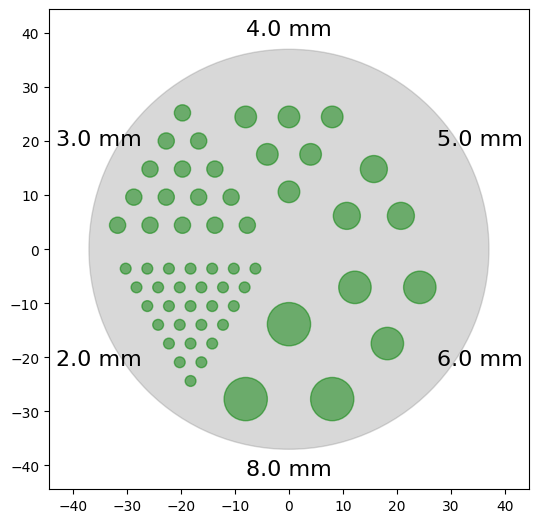

In [12]:
radius = 37.0
well_seps = (8.0, 6.0, 5.0, 4.0, 3.0, 2.0)
test_phantom = DerenzoPhantom(radius, well_seps, )
test_phantom.show()

Generate Mask for reference phantom

ic| myMask.shape: (1024, 1024)
ic| myMask.sum(): 107770.0


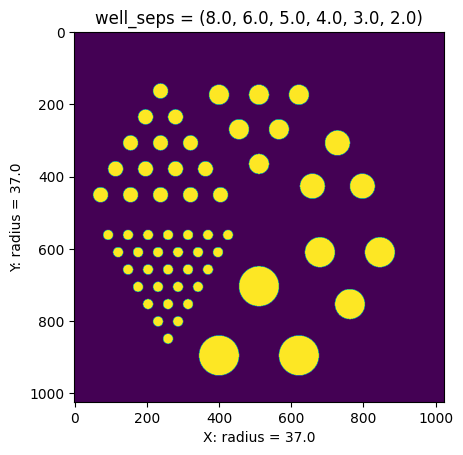

In [13]:
myMask=test_phantom.mask.reshape(1024,1024)
ic(myMask.shape)
ic(myMask.sum())
#plt.imshow(myMask)
plt.imshow(np.flipud(myMask))

plt.title('well_seps = (8.0, 6.0, 5.0, 4.0, 3.0, 2.0)')
plt.xlabel('X: radius = 37.0')
plt.ylabel('Y: radius = 37.0')
plt.show()

make meshgrid from volume and spacing

In [14]:
volume, spacing = load_example_ct()
bx, by, bz = torch.tensor(volume.shape) * torch.tensor(spacing) / 2
ic(bx, by, bz)
ic(volume.shape)
ic(spacing)

ic| bx: tensor(180.), by: tensor(180.), bz: tensor(166.2500)
ic| volume.shape: (512, 512, 133)
ic| spacing: [0.703125, 0.703125, 2.5]


[0.703125, 0.703125, 2.5]

Get lab frame coordinates for voxels in volume

In [15]:
    xlinspace=np.linspace(-256*spacing[0], 256*spacing[0], 512)
    ylinspace=np.linspace(-256*spacing[1], 256*spacing[1], 512)
    zlinspace=np.linspace(-66.5*spacing[2], 66.5*spacing[2], 133)
    xgrid,ygrid,zgrid = np.meshgrid(xlinspace, ylinspace,zlinspace)
    xgrid=xgrid.flatten()
    ygrid=ygrid.flatten()
    zgrid=zgrid.flatten()


Define 3D rotation matrices


In [16]:
# import math for rotation Matrix multiplication
import math as m

def Rx(theta):
  return np.matrix([[ 1, 0           , 0           ],
                   [ 0, m.cos(theta),-m.sin(theta)],
                   [ 0, m.sin(theta), m.cos(theta)]])

def Ry(theta):
  return np.matrix([[ m.cos(theta), 0, m.sin(theta)],
                   [ 0           , 1, 0           ],
                   [-m.sin(theta), 0, m.cos(theta)]])

def Rz(theta):
  return np.matrix([[ m.cos(theta), -m.sin(theta), 0 ],
                   [ m.sin(theta), m.cos(theta) , 0 ],
                   [ 0           , 0            , 1 ]])



#Specify 3D Phantom Geometry

with null Rotation=[0,0,0], Translation=[0,0,0]

---



In [17]:
# NULL TRANSLATION AND NULL ROTATION
#
#Hard-wire 100mm tall phantom for the moment
PhantomHalfZ=50.
ic(PhantomHalfZ)
#TranslatePhantom=[30.,40.,50.]
TranslatePhantom=[0.,0.,0.]
ic(TranslatePhantom)

# specify Euler angles for establishing Phantom orientation in lab frame
psi = 0.
#psi=np.pi/4.
#phi=np.pi/4.
phi=0.0
#theta=np.pi/6.
theta=0.0

psiDeg=psi*(180./np.pi)
thetaDeg=theta*(180./np.pi)
phiDeg=phi*(180./np.pi)

RotatePhantom=[phi,theta,psi]
ic(RotatePhantom)

spacingPhantom=[(2.*radius)/1024.,2.*radius/1024.,2.*PhantomHalfZ]
ic(spacingPhantom)

ic| PhantomHalfZ: 50.0
ic| TranslatePhantom: [0.0, 0.0, 0.0]
ic| RotatePhantom: [0.0, 0.0, 0.0]
ic| spacingPhantom: [0.072265625, 0.072265625, 100.0]


[0.072265625, 0.072265625, 100.0]

Position phantom in lab frame by first rotating by psi about initial z, then by theta about y', then by phi about z''

In [18]:
R_Invert= Rx(-phi) * Ry(-theta) * Rz(-psi)
print(np.round(R_Invert, decimals=2))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [19]:
# Transform from lab frame 'grid' to phantom reference frame through a series of transformations
#
# Invert translation from Lab System origin to Phantom System origin
ic(radius)
ic(PhantomHalfZ)
ic(TranslatePhantom)
xp1 = xgrid-TranslatePhantom[0]
yp1 = ygrid-TranslatePhantom[1]
zp1 = zgrid-TranslatePhantom[2]
ic(xp1.shape)

v1 = np.array([xp1,yp1,zp1])
v2 = R_Invert * v1

xp2=v2[0,:]
yp2=v2[1,:]
zp2=v2[2,:]

xp3=np.squeeze(np.asarray(xp2))
yp3=np.squeeze(np.asarray(yp2))
zp3=np.squeeze(np.asarray(zp2))
ic(xp1)
ic(xp2)
ic(xp3)

ic(xp1.size)
ic(xp1.shape)
ic(xp2.shape)
ic(xp3.shape)

ixPh=np.floor(((xp3+radius)/spacingPhantom[0])).astype(int)
ic(ixPh.max())
ic(ixPh.min())
iyPh=np.floor(((yp3+radius)/spacingPhantom[1])).astype(int)
ic(iyPh.max())
ic(iyPh.min())
#izPh=np.floor(((zp3+PhantomHalfZ)/spacingPhantom[2])).astype(int)
#ic(izPh.max())
#ic(izPh.min())

ic| radius: 37.0
ic| PhantomHalfZ: 50.0
ic| TranslatePhantom: [0.0, 0.0, 0.0]
ic| xp1.shape: (34865152,)
ic| xp1: array([-180., -180., -180., ...,  180.,  180.,  180.])
ic| xp2: matrix([[-180., -180., -180., ...,  180.,  180.,  180.]])
ic| xp3: array([-180., -180., -180., ...,  180.,  180.,  180.])
ic| xp1.size: 34865152
ic| xp1.shape: (34865152,)
ic| xp2.shape: (1, 34865152)
ic| xp3.shape: (34865152,)
ic| ixPh.max(): 3002
ic| ixPh.min(): -1979
ic| iyPh.max(): 3002
ic| iyPh.min(): -1979


-1979

Insert phantom into source volume

In [20]:
volumeShape=[512, 512, 133]
phantomShape=[1024,1024]
ic(volumeShape)
volume=np.zeros(volumeShape).flatten()
ic(volume.shape)

phantomMask=test_phantom.mask.reshape(1024,1024)
ic(phantomMask.shape)

ic(min(zp1))
ic(max(zp1))
ic(min(zp3))
ic(max(zp3))
validX=(ixPh>=0) & (ixPh<phantomShape[0])
validY=(iyPh>=0) & (iyPh<phantomShape[1])
validZ=(zp3>=-PhantomHalfZ) & (zp3<=PhantomHalfZ)
valid=(validX & validY & validZ).flatten()
ic(valid.shape)
ixPh2=ixPh[valid]
iyPh2=iyPh[valid]
Test=volume[valid]
ic(Test.shape)

volume=volume*0.
volume[valid]=phantomMask[ixPh2,iyPh2]

volume=volume.reshape(volumeShape)
PVCvolume=np.zeros(volume.shape,dtype=np.float32)
PVCvolume[1:511, 1:511, :] += volume[0:510, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[0:510, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[0:510, 2:512, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 2:512, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 2:512, :] / 9.

ic| volumeShape: [512, 512, 133]
ic| volume.shape: (34865152,)
ic| phantomMask.shape: (1024, 1024)
ic| min(zp1): -166.25
ic| max(zp1): 166.25
ic| min(zp3): -166.25
ic| max(zp3): 166.25
ic| valid.shape: (34865152,)
ic| Test.shape: (438204,)


Display Phantom projections within volume

ic| PVCvolume.shape: (512, 512, 133)
ic| SumX.shape: (512, 133)
ic| SumY.shape: (512, 133)
ic| SumZ.shape: (512, 512)


Text(0.5, 1.0, 'T= [0.0, 0.0, 0.0] R= [0.0, 0.0, 0.0] ')

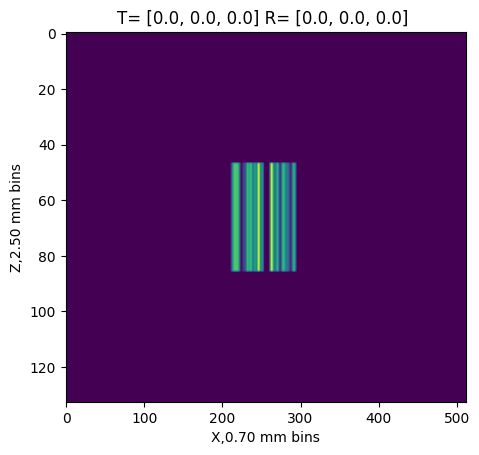

In [21]:
ic(PVCvolume.shape)
SumX=PVCvolume.sum(0)
SumY=PVCvolume.sum(1)
SumZ=PVCvolume.sum(2)
ic(SumX.shape)
ic(SumY.shape)
ic(SumZ.shape)

ThisAspect=spacing[2]/spacing[0]
plt.imshow(np.flipud(SumX.T),aspect=ThisAspect)
plt.xlabel(f'X,{spacing[0]:0.2f} mm bins')
plt.ylabel(f'Z,{spacing[2]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
plt.title(TranslateString + RotateString)

Text(0.5, 1.0, 'T= [0.0, 0.0, 0.0] R= [0.0, 0.0, 0.0] ')

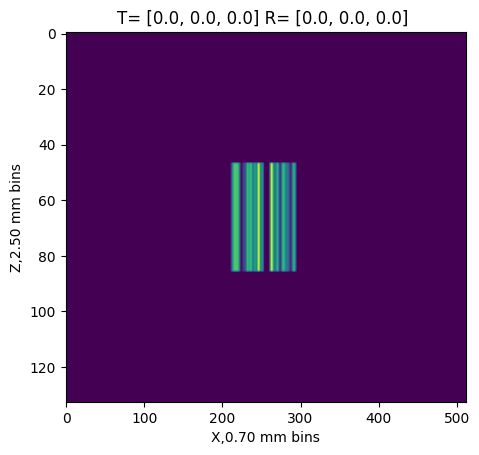

In [22]:
plt.xlabel(f'Y,{spacing[1]:0.2f} mm bins')
plt.ylabel(f'Z,{spacing[2]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
plt.title(TranslateString + RotateString)

ThisAspect=spacing[2]/spacing[0]
plt.imshow(np.flipud(SumX.T),aspect=ThisAspect)
plt.xlabel(f'X,{spacing[0]:0.2f} mm bins')
plt.ylabel(f'Z,{spacing[2]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
plt.title(TranslateString + RotateString)

Text(0.5, 1.0, 'T= [0.0, 0.0, 0.0] R= [0.0, 0.0, 0.0] ')

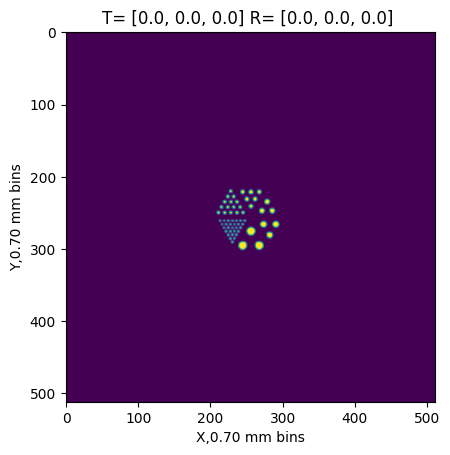

In [23]:
plt.imshow(np.flipud(SumZ.T))
plt.xlabel(f'X,{spacing[0]:0.2f} mm bins')
plt.ylabel(f'Y,{spacing[1]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
plt.title(TranslateString + RotateString)

Display axial projection

T= [0.0, 0.0, 0.0] 
R= [0.0, 0.0, 0.0] 


Text(0, 0.5, 'Y: radius = 37.0, HalfZ= 50.0, voxel =[] 0.07, 0.07, 2.5]')

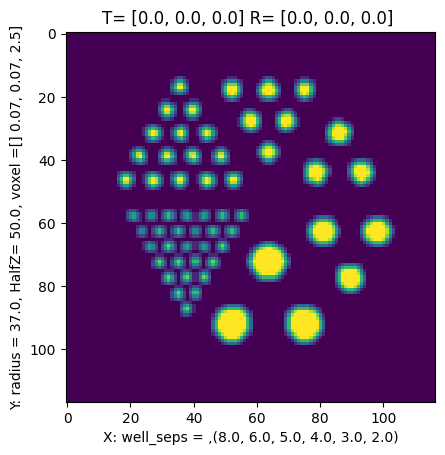

In [24]:
plt.imshow(np.flipud(SumZ[192:309,192:309].T))
psiDeg=(180/np.pi)*psi
thetaDeg=(180/np.pi)*theta
phiDeg=(180/np.pi)*phi
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
print(TranslateString)
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
print(RotateString)
plt.title(TranslateString + RotateString)
plt.xlabel(f'X: well_seps = ,{well_seps}')
VoxelString=f', voxel =[] {spacingPhantom[0]:.2f}, {spacingPhantom[1]:.2f}, {spacing[2]:.1f}]'
plt.ylabel(f'Y: radius = {radius:.1f}, HalfZ= {PhantomHalfZ:.1f}' + VoxelString)

#Insert phantom into source volume, with Rotation=[pi/4,0,0], Translation=[0,0,0]

In [25]:
# NULL TRANSLATION AND PSI ROTATION ONLY
#
#Hard-wire 100mm tall phantom for the moment
PhantomHalfZ=50.
ic(PhantomHalfZ)
#TranslatePhantom=[30.,40.,50.]
TranslatePhantom=[0.,0.,0.]
ic(TranslatePhantom)

# specify Euler angles for establishing Phantom orientation in lab frame
#psi = 0.
psi=np.pi/2.
#phi=np.pi/4.
phi=0.0
#theta=np.pi/6.
theta=0.0

psiDeg=psi*(180./np.pi)
thetaDeg=theta*(180./np.pi)
phiDeg=phi*(180./np.pi)

RotatePhantom=[phi,theta,psi]
ic(RotatePhantom)

spacingPhantom=[(2.*radius)/1024.,2.*radius/1024.,2.*PhantomHalfZ]
ic(spacingPhantom)

ic| PhantomHalfZ: 50.0
ic| TranslatePhantom: [0.0, 0.0, 0.0]
ic| RotatePhantom: [0.0, 0.0, 1.5707963267948966]
ic| spacingPhantom: [0.072265625, 0.072265625, 100.0]


[0.072265625, 0.072265625, 100.0]

Position phantom in lab frame by first rotating by psi about initial z, then by theta about y', then by phi about z''

In [27]:
R_Invert = Rx(-phi) * Ry(-theta) * Rz(-psi)
print(np.round(R_Invert, decimals=2))

[[ 0.  1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]]


In [28]:
# Transform from lab frame 'grid' to phantom reference frame through a series of transformations
#
# Invert translation from Lab System origin to Phantom System origin
ic(radius)
ic(PhantomHalfZ)
ic(TranslatePhantom)
xp1 = xgrid-TranslatePhantom[0]
yp1 = ygrid-TranslatePhantom[1]
zp1 = zgrid-TranslatePhantom[2]
ic(xp1.shape)

v1 = np.array([xp1,yp1,zp1])
v2 = R_Invert * v1

xp2=v2[0,:]
yp2=v2[1,:]
zp2=v2[2,:]

xp3=np.squeeze(np.asarray(xp2))
yp3=np.squeeze(np.asarray(yp2))
zp3=np.squeeze(np.asarray(zp2))
ic(xp1)
ic(xp2)
ic(xp3)

ic(xp1.size)
ic(xp1.shape)
ic(xp2.shape)
ic(xp3.shape)

ixPh=np.floor(((xp3+radius)/spacingPhantom[0])).astype(int)
ic(ixPh.max())
ic(ixPh.min())
iyPh=np.floor(((yp3+radius)/spacingPhantom[1])).astype(int)
ic(iyPh.max())
ic(iyPh.min())
izPh=np.floor(((zp3+PhantomHalfZ)/spacingPhantom[2])).astype(int)
ic(izPh.max())
ic(izPh.min())

ic| radius: 37.0
ic| PhantomHalfZ: 50.0
ic| TranslatePhantom: [0.0, 0.0, 0.0]
ic| xp1.shape: (34865152,)
ic| xp1: array([-180., -180., -180., ...,  180.,  180.,  180.])
ic| xp2: matrix([[-180., -180., -180., ...,  180.,  180.,  180.]])
ic| xp3: array([-180., -180., -180., ...,  180.,  180.,  180.])
ic| xp1.size: 34865152
ic| xp1.shape: (34865152,)
ic| xp2.shape: (1, 34865152)
ic| xp3.shape: (34865152,)
ic| ixPh.max(): 3002
ic| ixPh.min(): -1979
ic| iyPh.max(): 3002
ic| iyPh.min(): -1979
ic| izPh.max(): 2
ic| izPh.min(): -2


-2

Insert phantom into source volume

In [29]:
volumeShape=[512, 512, 133]
phantomShape=[1024,1024]
ic(volumeShape)
volume=np.zeros(volumeShape).flatten()
ic(volume.shape)

phantomMask=test_phantom.mask.reshape(1024,1024)
ic(phantomMask.shape)

validX=(ixPh>=0) & (ixPh<phantomShape[0])
validY=(iyPh>=0) & (iyPh<phantomShape[1])
validZ=(izPh>=0) & (izPh<1)
valid=(validX & validY & validZ).flatten().T
ic(valid.shape)
ixPh2=ixPh[valid]
iyPh2=iyPh[valid]
Test=volume[valid]
ic(Test.shape)
volume[valid]=phantomMask[ixPh2,iyPh2]

volume=volume.reshape(volumeShape)
PVCvolume=np.zeros(volume.shape,dtype=np.float32)
PVCvolume[1:511, 1:511, :] += volume[0:510, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[0:510, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[0:510, 2:512, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 2:512, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 2:512, :] / 9.

ic| volumeShape: [512, 512, 133]
ic| volume.shape: (34865152,)
ic| phantomMask.shape: (1024, 1024)
ic| valid.shape: (34865152,)
ic| Test.shape: (438204,)


Display Phantom projections within volume

ic| PVCvolume.shape: (512, 512, 133)
ic| SumX.shape: (512, 133)
ic| SumY.shape: (512, 133)
ic| SumZ.shape: (512, 512)


Text(0.5, 1.0, 'T= [0.0, 0.0, 0.0] R= [90.0, 0.0, 0.0] ')

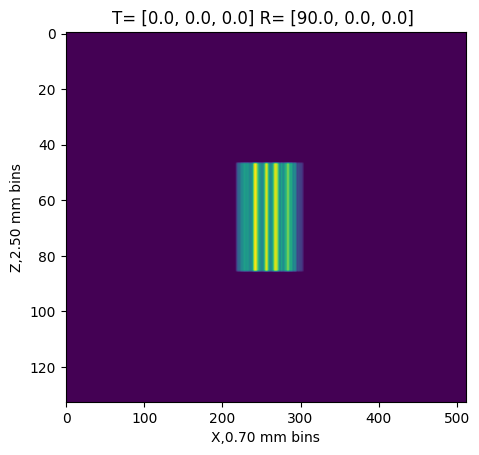

In [30]:
ic(PVCvolume.shape)
SumX=PVCvolume.sum(0)
SumY=PVCvolume.sum(1)
SumZ=PVCvolume.sum(2)
ic(SumX.shape)
ic(SumY.shape)
ic(SumZ.shape)

ThisAspect=spacing[2]/spacing[0]
plt.imshow(np.flipud(SumX.T),aspect=ThisAspect)
plt.xlabel(f'X,{spacing[0]:0.2f} mm bins')
plt.ylabel(f'Z,{spacing[2]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
plt.title(TranslateString + RotateString)

Text(0.5, 1.0, 'T= [0.0, 0.0, 0.0] R= [90.0, 0.0, 0.0] ')

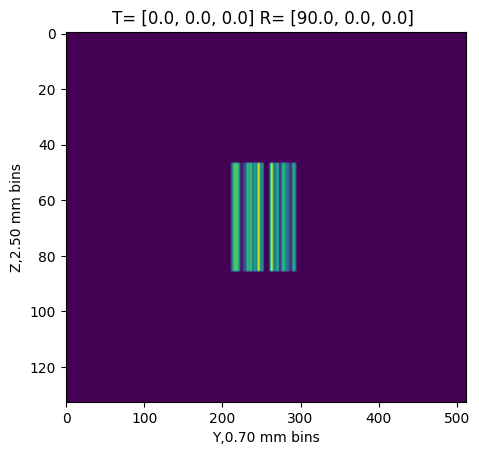

In [31]:
ThisAspect=spacing[2]/spacing[0]
plt.imshow(np.flipud(SumY.T),aspect=ThisAspect)
plt.xlabel(f'Y,{spacing[1]:0.2f} mm bins')
plt.ylabel(f'Z,{spacing[2]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
plt.title(TranslateString + RotateString)

Text(0.5, 1.0, 'T= [0.0, 0.0, 0.0] R= [90.0, 0.0, 0.0] ')

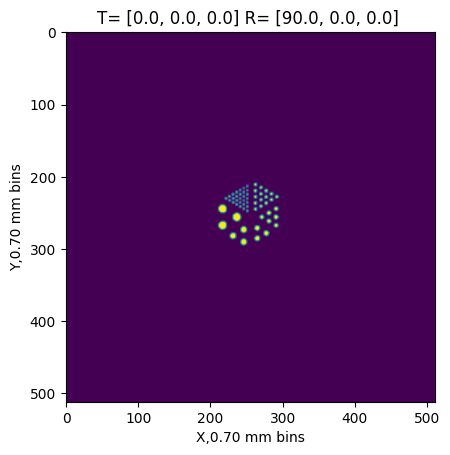

In [32]:
plt.imshow(np.flipud(SumZ.T))
plt.xlabel(f'X,{spacing[0]:0.2f} mm bins')
plt.ylabel(f'Y,{spacing[1]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
plt.title(TranslateString + RotateString)

Display axial projection

T= [0.0, 0.0, 0.0] 
R= [90.0, 0.0, 0.0] 


Text(0, 0.5, 'Y: radius = 37.0, HalfZ= 50.0, voxel =[] 0.07, 0.07, 2.5]')

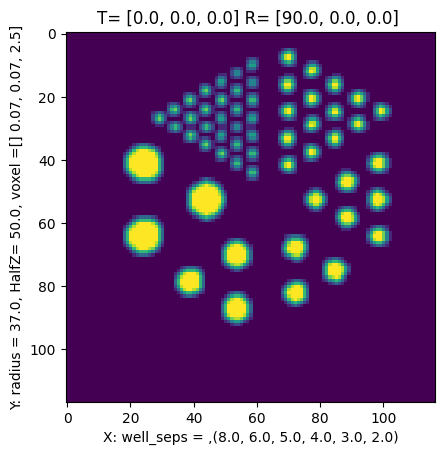

In [33]:
plt.imshow(np.flipud(SumZ[192:309,192:309].T))
psiDeg=(180/np.pi)*psi
thetaDeg=(180/np.pi)*theta
phiDeg=(180/np.pi)*phi
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
print(TranslateString)
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
print(RotateString)
plt.title(TranslateString + RotateString)
plt.xlabel(f'X: well_seps = ,{well_seps}')
VoxelString=f', voxel =[] {spacingPhantom[0]:.2f}, {spacingPhantom[1]:.2f}, {spacing[2]:.1f}]'
plt.ylabel(f'Y: radius = {radius:.1f}, HalfZ= {PhantomHalfZ:.1f}' + VoxelString)

#Insert phantom into source volume, with Rotation=[0.,5*(pi/180),0], Translation=[0,0,0]

In [34]:
# NULL TRANSLATION AND THETA ROTATION ONLY
#
#Hard-wire 100mm tall phantom for the moment
PhantomHalfZ=50.
ic(PhantomHalfZ)
#TranslatePhantom=[30.,40.,50.]
TranslatePhantom=[0.,0.,0.]
ic(TranslatePhantom)

# specify Euler angles for establishing Phantom orientation in lab frame
psi = 0.
#psi=np.pi/2.
phi=0.0
#phi=np.pi/6.
#theta=0.
theta=np.pi*(5./180.)

psiDeg=psi*(180./np.pi)
thetaDeg=theta*(180./np.pi)
phiDeg=phi*(180./np.pi)

RotatePhantom=[phi,theta,psi]
ic(RotatePhantom)

spacingPhantom=[(2.*radius)/1024.,2.*radius/1024.,spacing[2]]
ic(spacingPhantom)

ic| PhantomHalfZ: 50.0
ic| TranslatePhantom: [0.0, 0.0, 0.0]
ic| RotatePhantom: [0.0, 0.08726646259971647, 0.0]
ic| spacingPhantom: [0.072265625, 0.072265625, 2.5]


[0.072265625, 0.072265625, 2.5]

Position phantom in lab frame by first rotating by psi about initial z, then by theta about y', then by phi about z''

In [35]:
R_Invert = Rx(-phi) * Ry(-theta) * Rz(-psi)
print(np.round(R_Invert, decimals=2))

[[ 1.    0.   -0.09]
 [ 0.    1.    0.  ]
 [ 0.09  0.    1.  ]]


In [36]:
# Transform from lab frame 'grid' to phantom reference frame through a series of transformations
#
# Invert translation from Lab System origin to Phantom System origin
ic(radius)
ic(PhantomHalfZ)
ic(TranslatePhantom)
xp1 = xgrid-TranslatePhantom[0]
yp1 = ygrid-TranslatePhantom[1]
zp1 = zgrid-TranslatePhantom[2]
ic(xp1.shape)

v1 = np.array([xp1,yp1,zp1])
v2 = R_Invert * v1

xp2=v2[0,:]
yp2=v2[1,:]
zp2=v2[2,:]

xp3=np.squeeze(np.asarray(xp2))
yp3=np.squeeze(np.asarray(yp2))
zp3=np.squeeze(np.asarray(zp2))
ic(xp1)
ic(xp2)
ic(xp3)

ic(xp1.size)
ic(xp1.shape)
ic(xp2.shape)
ic(xp3.shape)

ixPh=np.floor(((xp3+radius)/spacingPhantom[0])).astype(int)
ic(ixPh.max())
ic(ixPh.min())
iyPh=np.floor(((yp3+radius)/spacingPhantom[1])).astype(int)
ic(iyPh.max())
ic(iyPh.min())
#volumeShape=[512, 512, 133]
#phantomShape=[1024,1024]

izPh=np.floor(((zp3+(spacingPhantom[2]*volume.shape[2])/2.)/spacingPhantom[2])).astype(int)
ic(izPh.max())
ic(izPh.min())

ic| radius: 37.0
ic| PhantomHalfZ: 50.0
ic| TranslatePhantom: [0.0, 0.0, 0.0]
ic| xp1.shape: (34865152,)
ic| xp1: array([-180., -180., -180., ...,  180.,  180.,  180.])
ic| xp2: matrix([[-164.82540342, -165.04494346, -165.26448349, ...,  165.26448349,
                   165.04494346,  164.82540342]])
ic| xp3: array([-164.82540342, -165.04494346, -165.26448349, ...,  165.26448349,
                 165.04494346,  164.82540342])
ic| xp1.size: 34865152
ic| xp1.shape: (34865152,)
ic| xp2.shape: (1, 34865152)
ic| xp3.shape: (34865152,)
ic| ixPh.max(): 3193
ic| ixPh.min(): -2170
ic| iyPh.max(): 3002
ic| iyPh.min(): -1979
ic| izPh.max(): 139
ic| izPh.min(): -7


-7

Insert phantom into source volume

In [37]:
volumeShape=[512, 512, 133]
phantomShape=[1024,1024,133]
ic(volumeShape)
volume=np.zeros(volumeShape).flatten()
ic(volume.shape)

phantomMask=test_phantom.mask.reshape(1024,1024)
ic(phantomMask.shape)

validX=(ixPh>=0) & (ixPh<phantomShape[0])
validY=(iyPh>=0) & (iyPh<phantomShape[1])
validZ=(zp3>=-PhantomHalfZ) & (zp3<=PhantomHalfZ)
valid=((validX & validY) & validZ).flatten().T
ic(valid.shape)
ixPh2=ixPh[valid]
iyPh2=iyPh[valid]
Test=volume[valid]
ic(Test.shape)
volume[valid]=phantomMask[ixPh2,iyPh2]

volume=volume.reshape(volumeShape)
PVCvolume=np.zeros(volume.shape,dtype=np.float32)
PVCvolume[1:511, 1:511, :] += volume[0:510, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[0:510, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[0:510, 2:512, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 2:512, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 2:512, :] / 9.

ic| volumeShape: [512, 512, 133]
ic| volume.shape: (34865152,)
ic| phantomMask.shape: (1024, 1024)
ic| valid.shape: (34865152,)
ic| Test.shape: (440960,)


Display Phantom projections within volume

ic| PVCvolume.shape: (512, 512, 133)
ic| SumX.shape: (512, 133)
ic| SumY.shape: (512, 133)
ic| SumZ.shape: (512, 512)


Text(0.5, 1.0, 'T= [0.0, 0.0, 0.0] R= [0.0, 5.0, 0.0] ')

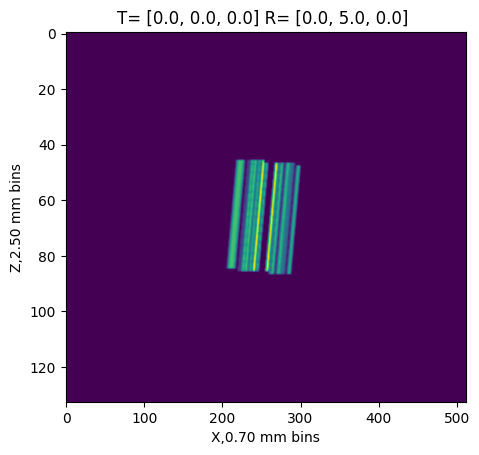

In [38]:
ic(PVCvolume.shape)
SumX=PVCvolume.sum(0)
SumY=PVCvolume.sum(1)
SumZ=PVCvolume.sum(2)
ic(SumX.shape)
ic(SumY.shape)
ic(SumZ.shape)

ThisAspect=spacing[2]/spacing[0]
plt.imshow(np.flipud(SumX.T),aspect=ThisAspect)
plt.xlabel(f'X,{spacing[0]:0.2f} mm bins')
plt.ylabel(f'Z,{spacing[2]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
plt.title(TranslateString + RotateString)

Text(0.5, 1.0, 'T= [0.0, 0.0, 0.0] R= [0.0, 5.0, 0.0] ')

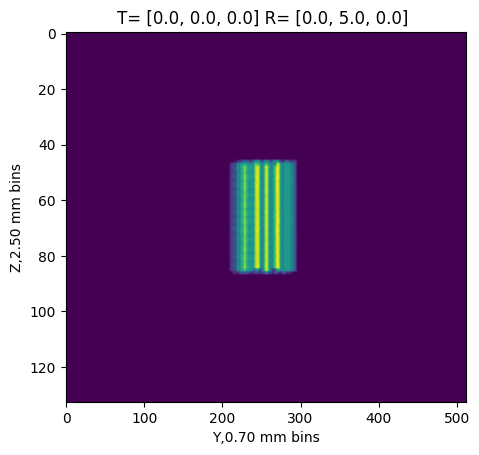

In [39]:
ThisAspect=spacing[2]/spacing[0]
plt.imshow(np.flipud(SumY.T),aspect=ThisAspect)
plt.xlabel(f'Y,{spacing[1]:0.2f} mm bins')
plt.ylabel(f'Z,{spacing[2]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
plt.title(TranslateString + RotateString)


Text(0.5, 1.0, 'T= [0.0, 0.0, 0.0] R= [0.0, 5.0, 0.0] ')

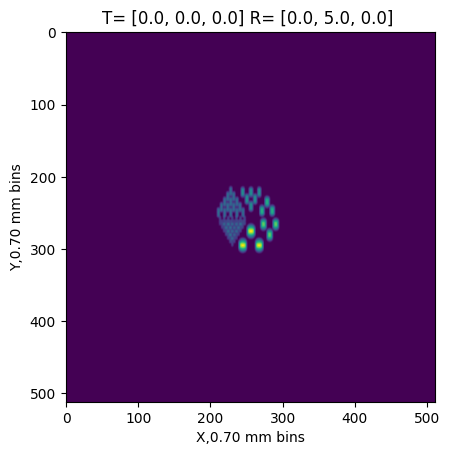

In [40]:
plt.imshow(np.flipud(SumZ.T))
plt.xlabel(f'X,{spacing[0]:0.2f} mm bins')
plt.ylabel(f'Y,{spacing[1]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
plt.title(TranslateString + RotateString)

Display axial projection

T= [0.0, 0.0, 0.0] 
R= [0.0, 5.0, 0.0] 


Text(0, 0.5, 'Y: radius = 37.0, HalfZ= 50.0, voxel =[] 0.07, 0.07, 2.5]')

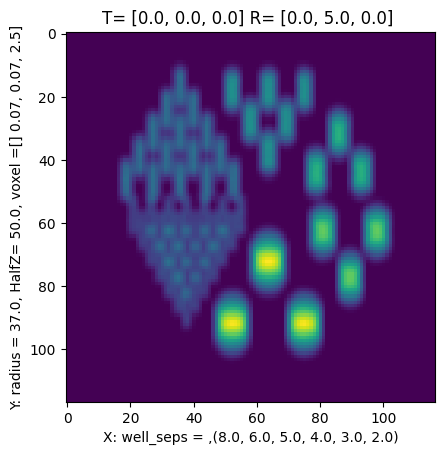

In [41]:
plt.imshow(np.flipud(SumZ[192:309,192:309].T))
psiDeg=(180/np.pi)*psi
thetaDeg=(180/np.pi)*theta
phiDeg=(180/np.pi)*phi
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
print(TranslateString)
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
print(RotateString)
plt.title(TranslateString + RotateString)
plt.xlabel(f'X: well_seps = ,{well_seps}')
VoxelString=f', voxel =[] {spacingPhantom[0]:.2f}, {spacingPhantom[1]:.2f}, {spacing[2]:.1f}]'
plt.ylabel(f'Y: radius = {radius:.1f}, HalfZ= {PhantomHalfZ:.1f}' + VoxelString)

#Insert phantom into source volume, with Rotation=[0.,0.,3*(pi/180)], Translation=[0,0,0]

In [42]:
# NULL TRANSLATION AND PHI ROTATION ONLY
#
#Hard-wire 100mm tall phantom for the moment
PhantomHalfZ=50.
ic(PhantomHalfZ)
#TranslatePhantom=[30.,40.,50.]
TranslatePhantom=[0.,0.,0.]
ic(TranslatePhantom)

# specify Euler angles for establishing Phantom orientation in lab frame
psi = 0.
#psi=np.pi/2.
theta=0.
#theta=np.pi*(5./180.)
#phi=0.0
phi=np.pi*(3./180.)

psiDeg=psi*(180./np.pi)
thetaDeg=theta*(180./np.pi)
phiDeg=phi*(180./np.pi)

RotatePhantom=[phi,theta,psi]
ic(RotatePhantom)

spacingPhantom=[(2.*radius)/1024.,2.*radius/1024.,2.*PhantomHalfZ]
ic(spacingPhantom)

ic| PhantomHalfZ: 50.0
ic| TranslatePhantom: [0.0, 0.0, 0.0]
ic| RotatePhantom: [0.05235987755982988, 0.0, 0.0]
ic| spacingPhantom: [0.072265625, 0.072265625, 100.0]


[0.072265625, 0.072265625, 100.0]

Position phantom in lab frame by first rotating by psi about initial z, then by theta about y', then by phi about z''

In [43]:
R_Invert = Rx(-phi) * Ry(-theta) * Rz(-psi)
print(np.round(R_Invert, decimals=2))

[[ 1.    0.    0.  ]
 [ 0.    1.    0.05]
 [ 0.   -0.05  1.  ]]


In [44]:
# Transform from lab frame 'grid' to phantom reference frame through a series of transformations
#
# Invert translation from Lab System origin to Phantom System origin
ic(radius)
ic(PhantomHalfZ)
ic(TranslatePhantom)
xp1 = xgrid-TranslatePhantom[0]
yp1 = ygrid-TranslatePhantom[1]
zp1 = zgrid-TranslatePhantom[2]
ic(xp1.shape)

v1 = np.array([xp1,yp1,zp1])
v2 = R_Invert * v1

xp2=v2[0,:]
yp2=v2[1,:]
zp2=v2[2,:]

xp3=np.squeeze(np.asarray(xp2))
yp3=np.squeeze(np.asarray(yp2))
zp3=np.squeeze(np.asarray(zp2))
ic(xp1)
ic(xp2)
ic(xp3)

ic(xp1.size)
ic(xp1.shape)
ic(xp2.shape)
ic(xp3.shape)

ixPh=np.floor(((xp3+radius)/spacingPhantom[0])).astype(int)
ic(ixPh.max())
ic(ixPh.min())
iyPh=np.floor(((yp3+radius)/spacingPhantom[1])).astype(int)
ic(iyPh.max())
ic(iyPh.min())
izPh=np.floor(((zp3+PhantomHalfZ)/spacingPhantom[2])).astype(int)
ic(izPh.max())
ic(izPh.min())

ic| radius: 37.0
ic| PhantomHalfZ: 50.0
ic| TranslatePhantom: [0.0, 0.0, 0.0]
ic| xp1.shape: (34865152,)
ic| xp1: array([-180., -180., -180., ...,  180.,  180.,  180.])
ic| xp2: matrix([[-180., -180., -180., ...,  180.,  180.,  180.]])
ic| xp3: array([-180., -180., -180., ...,  180.,  180.,  180.])
ic| xp1.size: 34865152
ic| xp1.shape: (34865152,)
ic| xp2.shape: (1, 34865152)
ic| xp3.shape: (34865152,)
ic| ixPh.max(): 3002
ic| ixPh.min(): -1979
ic| iyPh.max(): 3119
ic| iyPh.min(): -2096
ic| izPh.max(): 2
ic| izPh.min(): -2


-2

Insert phantom into source volume

In [45]:
volumeShape=[512, 512, 133]
phantomShape=[1024,1024]
ic(volumeShape)
volume=np.zeros(volumeShape).flatten()
ic(volume.shape)

phantomMask=test_phantom.mask.reshape(1024,1024)
ic(phantomMask.shape)

validX=(ixPh>=0) & (ixPh<phantomShape[0])
validY=(iyPh>=0) & (iyPh<phantomShape[1])
validZ=(izPh>=0) & (izPh<1)
valid=(validX & validY & validZ).flatten().T
ic(valid.shape)
ixPh2=ixPh[valid]
iyPh2=iyPh[valid]
Test=volume[valid]
ic(Test.shape)
volume[valid]=phantomMask[ixPh2,iyPh2]

volume=volume.reshape(volumeShape)
PVCvolume=np.zeros(volume.shape,dtype=np.float32)
PVCvolume[1:511, 1:511, :] += volume[0:510, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[0:510, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[0:510, 2:512, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 2:512, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 2:512, :] / 9.

ic| volumeShape: [512, 512, 133]
ic| volume.shape: (34865152,)
ic| phantomMask.shape: (1024, 1024)
ic| valid.shape: (34865152,)
ic| Test.shape: (443504,)


Display Phantom projections within volume

ic| PVCvolume.shape: (512, 512, 133)
ic| SumX.shape: (512, 133)
ic| SumY.shape: (512, 133)
ic| SumZ.shape: (512, 512)


Text(0.5, 1.0, 'T= [0.0, 0.0, 0.0] R= [0.0, 0.0, 3.0] ')

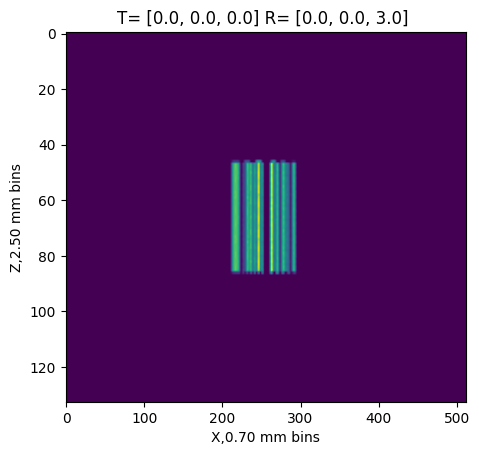

In [46]:
ic(PVCvolume.shape)
SumX=PVCvolume.sum(0)
SumY=PVCvolume.sum(1)
SumZ=PVCvolume.sum(2)
ic(SumX.shape)
ic(SumY.shape)
ic(SumZ.shape)

ThisAspect=spacing[2]/spacing[0]
plt.imshow(np.flipud(SumX.T),aspect=ThisAspect)
plt.xlabel(f'X,{spacing[0]:0.2f} mm bins')
plt.ylabel(f'Z,{spacing[2]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
plt.title(TranslateString + RotateString)

Text(0.5, 1.0, 'T= [0.0, 0.0, 0.0] R= [0.0, 0.0, 3.0] ')

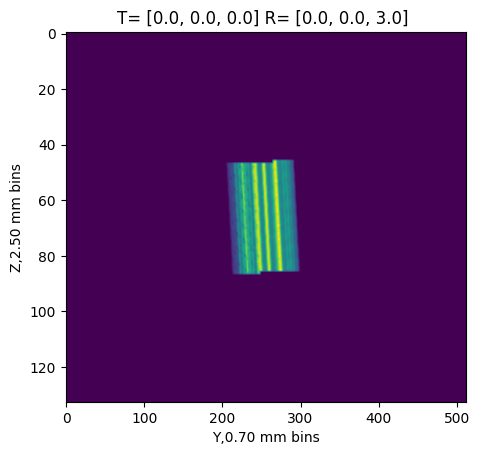

In [47]:
ThisAspect=spacing[2]/spacing[0]
plt.imshow(np.flipud(SumY.T),aspect=ThisAspect)
plt.xlabel(f'Y,{spacing[1]:0.2f} mm bins')
plt.ylabel(f'Z,{spacing[2]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
plt.title(TranslateString + RotateString)


Text(0.5, 1.0, 'T= [0.0, 0.0, 0.0] R= [0.0, 0.0, 3.0] ')

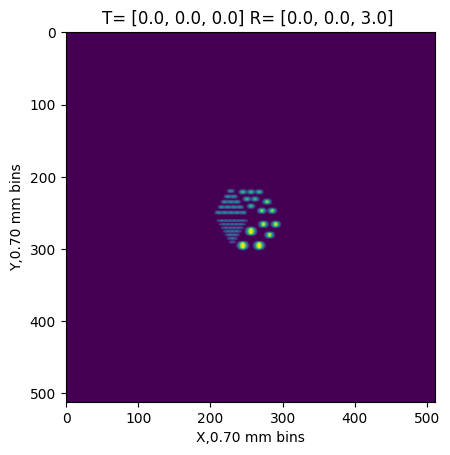

In [48]:
plt.imshow(np.flipud(SumZ.T))
plt.xlabel(f'X,{spacing[0]:0.2f} mm bins')
plt.ylabel(f'Y,{spacing[1]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
plt.title(TranslateString + RotateString)

Display axial projection

T= [0.0, 0.0, 0.0] 
R= [0.0, 0.0, 3.0] 


Text(0, 0.5, 'Y: radius = 37.0, HalfZ= 50.0, voxel =[] 0.07, 0.07, 2.5]')

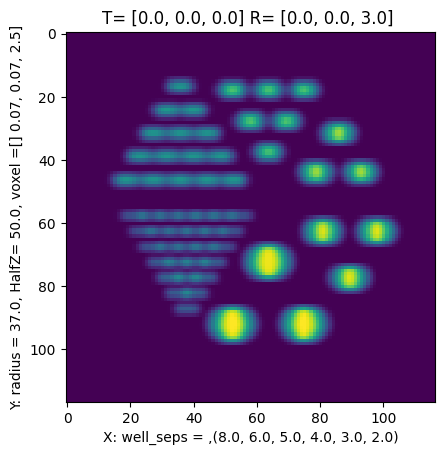

In [49]:
plt.imshow(np.flipud(SumZ[192:309,192:309].T))
psiDeg=(180/np.pi)*psi
thetaDeg=(180/np.pi)*theta
phiDeg=(180/np.pi)*phi
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
print(TranslateString)
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
print(RotateString)
plt.title(TranslateString + RotateString)
plt.xlabel(f'X: well_seps = ,{well_seps}')
VoxelString=f', voxel =[] {spacingPhantom[0]:.2f}, {spacingPhantom[1]:.2f}, {spacing[2]:.1f}]'
plt.ylabel(f'Y: radius = {radius:.1f}, HalfZ= {PhantomHalfZ:.1f}' + VoxelString)

#Insert phantom into source volume, with Rotation=[py/2,0.,3*(pi/180)], Translation=[0,0,0]

In [50]:
# NULL TRANSLATION WITH PSI FOLLOWED BY PHI ROTATION
#
#Hard-wire 100mm tall phantom for the moment
PhantomHalfZ=50.
ic(PhantomHalfZ)
#TranslatePhantom=[30.,40.,50.]
TranslatePhantom=[0.,0.,0.]
ic(TranslatePhantom)

# specify Euler angles for establishing Phantom orientation in lab frame
#psi = 0.
psi=np.pi/2.
theta=0.
#theta=np.pi*(5./180.)
#phi=0.0
phi=np.pi*(3./180.)

psiDeg=psi*(180./np.pi)
thetaDeg=theta*(180./np.pi)
phiDeg=phi*(180./np.pi)

RotatePhantom=[phi,theta,psi]
ic(RotatePhantom)

spacingPhantom=[(2.*radius)/1024.,2.*radius/1024.,2.*PhantomHalfZ]
ic(spacingPhantom)

ic| PhantomHalfZ: 50.0
ic| TranslatePhantom: [0.0, 0.0, 0.0]
ic| RotatePhantom: [0.05235987755982988, 0.0, 1.5707963267948966]
ic| spacingPhantom: [0.072265625, 0.072265625, 100.0]


[0.072265625, 0.072265625, 100.0]

Position phantom in lab frame by first rotating by psi about initial z, then by theta about y', then by phi about z''

In [51]:
R_Invert = Rx(-phi) * Ry(-theta) * Rz(-psi)
print(np.round(R_Invert, decimals=2))

[[ 0.    1.    0.  ]
 [-1.    0.    0.05]
 [ 0.05 -0.    1.  ]]


In [52]:
# Transform from lab frame 'grid' to phantom reference frame through a series of transformations
#
# Invert translation from Lab System origin to Phantom System origin
ic(radius)
ic(PhantomHalfZ)
ic(TranslatePhantom)
xp1 = xgrid-TranslatePhantom[0]
yp1 = ygrid-TranslatePhantom[1]
zp1 = zgrid-TranslatePhantom[2]
ic(xp1.shape)

v1 = np.array([xp1,yp1,zp1])
v2 = R_Invert * v1

xp2=v2[0,:]
yp2=v2[1,:]
zp2=v2[2,:]

xp3=np.squeeze(np.asarray(xp2))
yp3=np.squeeze(np.asarray(yp2))
zp3=np.squeeze(np.asarray(zp2))
ic(xp1)
ic(xp2)
ic(xp3)

ic(xp1.size)
ic(xp1.shape)
ic(xp2.shape)
ic(xp3.shape)

ixPh=np.floor(((xp3+radius)/spacingPhantom[0])).astype(int)
ic(ixPh.max())
ic(ixPh.min())
iyPh=np.floor(((yp3+radius)/spacingPhantom[1])).astype(int)
ic(iyPh.max())
ic(iyPh.min())
izPh=np.floor(((zp3+PhantomHalfZ)/spacingPhantom[2])).astype(int)
ic(izPh.max())
ic(izPh.min())

ic| radius: 37.0
ic| PhantomHalfZ: 50.0
ic| TranslatePhantom: [0.0, 0.0, 0.0]
ic| xp1.shape: (34865152,)
ic| xp1: array([-180., -180., -180., ...,  180.,  180.,  180.])
ic| xp2: matrix([[-180., -180., -180., ...,  180.,  180.,  180.]])
ic| xp3: array([-180., -180., -180., ...,  180.,  180.,  180.])
ic| xp1.size: 34865152
ic| xp1.shape: (34865152,)
ic| xp2.shape: (1, 34865152)
ic| xp3.shape: (34865152,)
ic| ixPh.max(): 3002
ic| ixPh.min(): -1979
ic| iyPh.max(): 3119
ic| iyPh.min(): -2096
ic| izPh.max(): 2
ic| izPh.min(): -2


-2

Insert phantom into source volume

In [53]:
volumeShape=[512, 512, 133]
phantomShape=[1024,1024]
ic(volumeShape)
volume=np.zeros(volumeShape).flatten()
ic(volume.shape)

phantomMask=test_phantom.mask.reshape(1024,1024)
ic(phantomMask.shape)

validX=(ixPh>=0) & (ixPh<phantomShape[0])
validY=(iyPh>=0) & (iyPh<phantomShape[1])
validZ=(izPh>=0) & (izPh<1)
valid=(validX & validY & validZ).flatten().T
ic(valid.shape)
ixPh2=ixPh[valid]
iyPh2=iyPh[valid]
Test=volume[valid]
ic(Test.shape)
volume[valid]=phantomMask[ixPh2,iyPh2]

volume=volume.reshape(volumeShape)
PVCvolume=np.zeros(volume.shape,dtype=np.float32)
PVCvolume[1:511, 1:511, :] += volume[0:510, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[0:510, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[0:510, 2:512, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 2:512, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 2:512, :] / 9.

ic| volumeShape: [512, 512, 133]
ic| volume.shape: (34865152,)
ic| phantomMask.shape: (1024, 1024)
ic| valid.shape: (34865152,)
ic| Test.shape: (443504,)


Display Phantom projections within volume

ic| PVCvolume.shape: (512, 512, 133)
ic| SumX.shape: (512, 133)
ic| SumY.shape: (512, 133)
ic| SumZ.shape: (512, 512)


Text(0.5, 1.0, 'T= [0.0, 0.0, 0.0] R= [90.0, 0.0, 3.0] ')

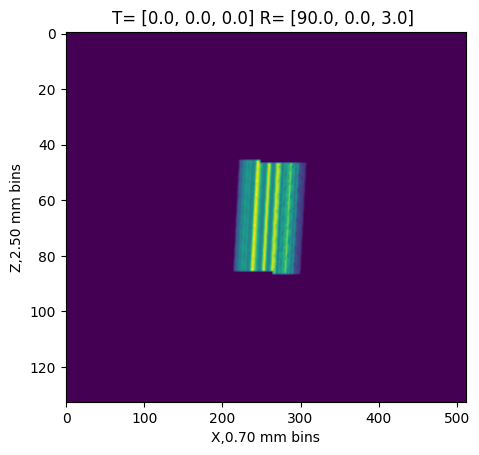

In [54]:
ic(PVCvolume.shape)
SumX=PVCvolume.sum(0)
SumY=PVCvolume.sum(1)
SumZ=PVCvolume.sum(2)
ic(SumX.shape)
ic(SumY.shape)
ic(SumZ.shape)

ThisAspect=spacing[2]/spacing[0]
plt.imshow(np.flipud(SumX.T),aspect=ThisAspect)
plt.xlabel(f'X,{spacing[0]:0.2f} mm bins')
plt.ylabel(f'Z,{spacing[2]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
plt.title(TranslateString + RotateString)

Text(0.5, 1.0, 'T= [0.0, 0.0, 0.0] R= [90.0, 0.0, 3.0] ')

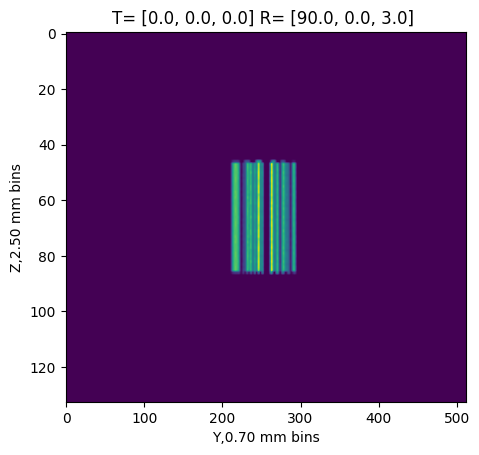

In [55]:
ThisAspect=spacing[2]/spacing[0]
plt.imshow(np.flipud(SumY.T),aspect=ThisAspect)
plt.xlabel(f'Y,{spacing[1]:0.2f} mm bins')
plt.ylabel(f'Z,{spacing[2]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
plt.title(TranslateString + RotateString)


Text(0.5, 1.0, 'T= [0.0, 0.0, 0.0] R= [90.0, 0.0, 3.0] ')

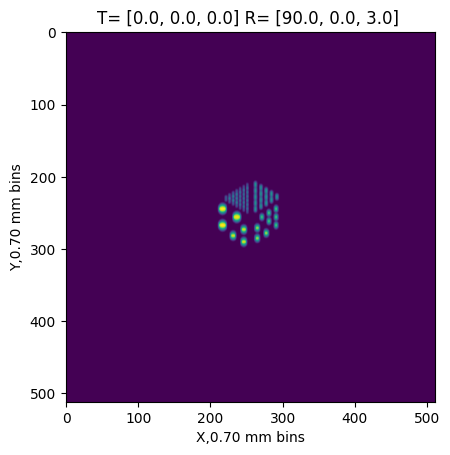

In [56]:
plt.imshow(np.flipud(SumZ.T))
plt.xlabel(f'X,{spacing[0]:0.2f} mm bins')
plt.ylabel(f'Y,{spacing[1]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
plt.title(TranslateString + RotateString)

Display axial projection

T= [0.0, 0.0, 0.0] 
R= [90.0, 0.0, 3.0] 


Text(0, 0.5, 'Y: radius = 37.0, HalfZ= 50.0, voxel =[] 0.07, 0.07, 2.5]')

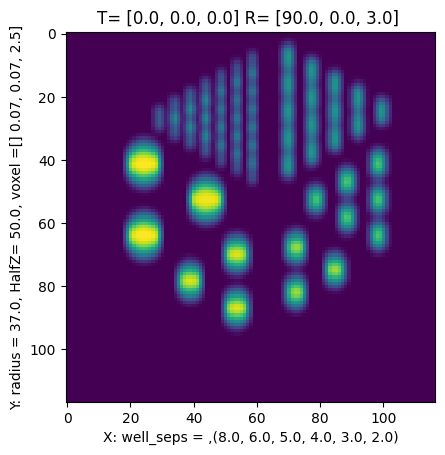

In [57]:
plt.imshow(np.flipud(SumZ[192:309,192:309].T))
psiDeg=(180/np.pi)*psi
thetaDeg=(180/np.pi)*theta
phiDeg=(180/np.pi)*phi
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
print(TranslateString)
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
print(RotateString)
plt.title(TranslateString + RotateString)
plt.xlabel(f'X: well_seps = ,{well_seps}')
VoxelString=f', voxel =[] {spacingPhantom[0]:.2f}, {spacingPhantom[1]:.2f}, {spacing[2]:.1f}]'
plt.ylabel(f'Y: radius = {radius:.1f}, HalfZ= {PhantomHalfZ:.1f}' + VoxelString)

#Insert phantom into source volume, with Rotation=[0,5*(pi/180),3*(pi/180)], Translation=[0,0,0]

In [58]:
# NULL TRANSLATION WITH PSI FOLLOWED BY PHI ROTATION
#
#Hard-wire 100mm tall phantom for the moment
PhantomHalfZ=50.
ic(PhantomHalfZ)
#TranslatePhantom=[30.,40.,50.]
TranslatePhantom=[0.,0.,0.]
ic(TranslatePhantom)

# specify Euler angles for establishing Phantom orientation in lab frame
psi = 0.
#psi=np.pi/2.
#theta=0.
theta=np.pi*(5./180.)
#phi=0.0
phi=np.pi*(3./180.)

psiDeg=psi*(180./np.pi)
thetaDeg=theta*(180./np.pi)
phiDeg=phi*(180./np.pi)

RotatePhantom=[phi,theta,psi]
ic(RotatePhantom)

spacingPhantom=[(2.*radius)/1024.,2.*radius/1024.,2.*PhantomHalfZ]
ic(spacingPhantom)

ic| PhantomHalfZ: 50.0
ic| TranslatePhantom: [0.0, 0.0, 0.0]
ic| RotatePhantom: [0.05235987755982988, 0.08726646259971647, 0.0]
ic| spacingPhantom: [0.072265625, 0.072265625, 100.0]


[0.072265625, 0.072265625, 100.0]

Position phantom in lab frame by first rotating by psi about initial z, then by theta about y', then by phi about z''

In [59]:
R_Invert = Rx(-phi) * Ry(-theta) * Rz(-psi)
print(np.round(R_Invert, decimals=2))

[[ 1.    0.   -0.09]
 [ 0.    1.    0.05]
 [ 0.09 -0.05  0.99]]


In [60]:
# Transform from lab frame 'grid' to phantom reference frame through a series of transformations
#
# Invert translation from Lab System origin to Phantom System origin
ic(radius)
ic(PhantomHalfZ)
ic(TranslatePhantom)
xp1 = xgrid-TranslatePhantom[0]
yp1 = ygrid-TranslatePhantom[1]
zp1 = zgrid-TranslatePhantom[2]
ic(xp1.shape)

v1 = np.array([xp1,yp1,zp1])
v2 = R_Invert * v1

xp2=v2[0,:]
yp2=v2[1,:]
zp2=v2[2,:]

xp3=np.squeeze(np.asarray(xp2))
yp3=np.squeeze(np.asarray(yp2))
zp3=np.squeeze(np.asarray(zp2))
ic(xp1)
ic(xp2)
ic(xp3)

ic(xp1.size)
ic(xp1.shape)
ic(xp2.shape)
ic(xp3.shape)

ixPh=np.floor(((xp3+radius)/spacingPhantom[0])).astype(int)
ic(ixPh.max())
ic(ixPh.min())
iyPh=np.floor(((yp3+radius)/spacingPhantom[1])).astype(int)
ic(iyPh.max())
ic(iyPh.min())
izPh=np.floor(((zp3+PhantomHalfZ)/spacingPhantom[2])).astype(int)
ic(izPh.max())
ic(izPh.min())

ic| radius: 37.0
ic| PhantomHalfZ: 50.0
ic| TranslatePhantom: [0.0, 0.0, 0.0]
ic| xp1.shape: (34865152,)
ic| xp1: array([-180., -180., -180., ...,  180.,  180.,  180.])
ic| xp2: matrix([[-164.82540342, -165.04494346, -165.26448349, ...,  165.26448349,
                   165.04494346,  164.82540342]])
ic| xp3: array([-164.82540342, -165.04494346, -165.26448349, ...,  165.26448349,
                 165.04494346,  164.82540342])
ic| xp1.size: 34865152
ic| xp1.shape: (34865152,)
ic| xp2.shape: (1, 34865152)
ic| xp3.shape: (34865152,)
ic| ixPh.max(): 3193
ic| ixPh.min(): -2170
ic| iyPh.max(): 3130
ic| iyPh.min(): -2107
ic| izPh.max(): 2
ic| izPh.min(): -2


-2

Insert phantom into source volume

In [61]:
volumeShape=[512, 512, 133]
phantomShape=[1024,1024]
ic(volumeShape)
volume=np.zeros(volumeShape).flatten()
ic(volume.shape)

phantomMask=test_phantom.mask.reshape(1024,1024)
ic(phantomMask.shape)

validX=(ixPh>=0) & (ixPh<phantomShape[0])
validY=(iyPh>=0) & (iyPh<phantomShape[1])
validZ=(izPh>=0) & (izPh<1)
valid=(validX & validY & validZ).flatten().T
ic(valid.shape)
ixPh2=ixPh[valid]
iyPh2=iyPh[valid]
Test=volume[valid]
ic(Test.shape)
volume[valid]=phantomMask[ixPh2,iyPh2]

volume=volume.reshape(volumeShape)
PVCvolume=np.zeros(volume.shape,dtype=np.float32)
PVCvolume[1:511, 1:511, :] += volume[0:510, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[0:510, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[0:510, 2:512, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 2:512, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 2:512, :] / 9.

ic| volumeShape: [512, 512, 133]
ic| volume.shape: (34865152,)
ic| phantomMask.shape: (1024, 1024)
ic| valid.shape: (34865152,)
ic| Test.shape: (438034,)


Display Phantom projections within volume

ic| PVCvolume.shape: (512, 512, 133)
ic| SumX.shape: (512, 133)
ic| SumY.shape: (512, 133)
ic| SumZ.shape: (512, 512)


Text(0.5, 1.0, 'T= [0.0, 0.0, 0.0] R= [0.0, 5.0, 3.0] ')

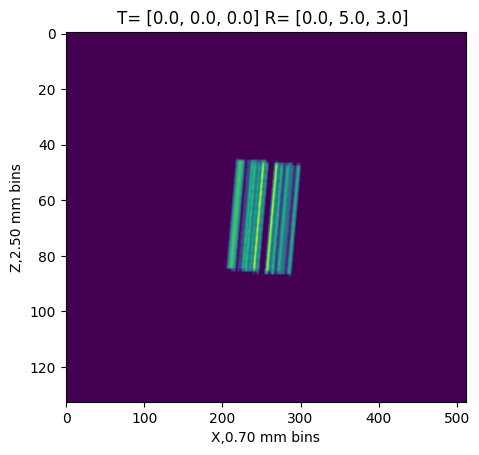

In [62]:
ic(PVCvolume.shape)
SumX=PVCvolume.sum(0)
SumY=PVCvolume.sum(1)
SumZ=PVCvolume.sum(2)
ic(SumX.shape)
ic(SumY.shape)
ic(SumZ.shape)

ThisAspect=spacing[2]/spacing[0]
plt.imshow(np.flipud(SumX.T),aspect=ThisAspect)
plt.xlabel(f'X,{spacing[0]:0.2f} mm bins')
plt.ylabel(f'Z,{spacing[2]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
plt.title(TranslateString + RotateString)

Text(0.5, 1.0, 'T= [0.0, 0.0, 0.0] R= [0.0, 5.0, 3.0] ')

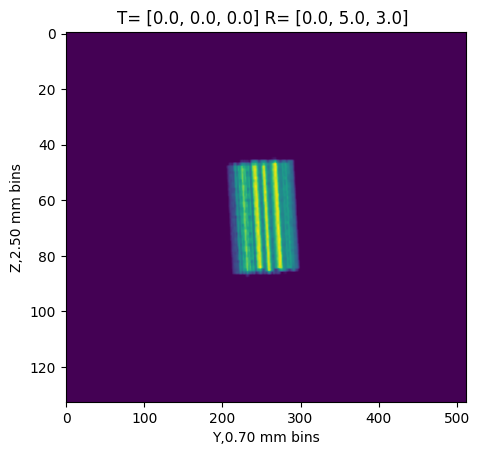

In [63]:
ThisAspect=spacing[2]/spacing[0]
plt.imshow(np.flipud(SumY.T),aspect=ThisAspect)
plt.xlabel(f'Y,{spacing[1]:0.2f} mm bins')
plt.ylabel(f'Z,{spacing[2]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
plt.title(TranslateString + RotateString)

Text(0.5, 1.0, 'T= [0.0, 0.0, 0.0] R= [0.0, 5.0, 3.0] ')

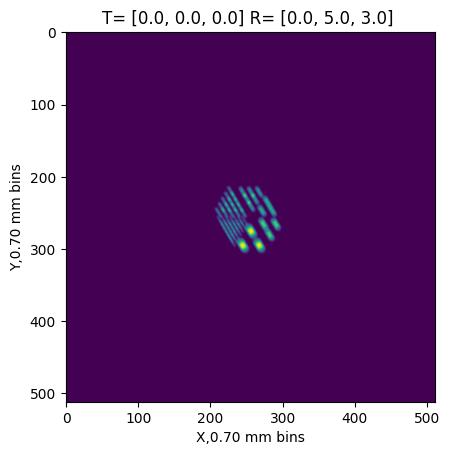

In [64]:
plt.imshow(np.flipud(SumZ.T))
plt.xlabel(f'X,{spacing[0]:0.2f} mm bins')
plt.ylabel(f'Y,{spacing[1]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
plt.title(TranslateString + RotateString)

Display axial projection

T= [0.0, 0.0, 0.0] 
R= [0.0, 5.0, 3.0] 


Text(0, 0.5, 'Y: radius = 37.0, HalfZ= 50.0, voxel =[] 0.07, 0.07, 2.5]')

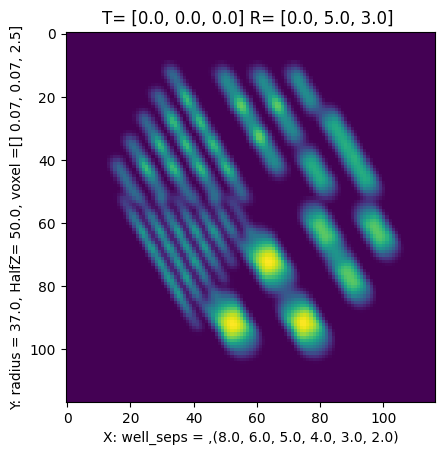

In [65]:
plt.imshow(np.flipud(SumZ[192:309,192:309].T))
psiDeg=(180/np.pi)*psi
thetaDeg=(180/np.pi)*theta
phiDeg=(180/np.pi)*phi
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
print(TranslateString)
RotateString=f'R= [{psiDeg:.1f}, ' + f'{thetaDeg:.1f}, ' + f'{phiDeg:.1f}] '
print(RotateString)
plt.title(TranslateString + RotateString)
plt.xlabel(f'X: well_seps = ,{well_seps}')
VoxelString=f', voxel =[] {spacingPhantom[0]:.2f}, {spacingPhantom[1]:.2f}, {spacing[2]:.1f}]'
plt.ylabel(f'Y: radius = {radius:.1f}, HalfZ= {PhantomHalfZ:.1f}' + VoxelString)